In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

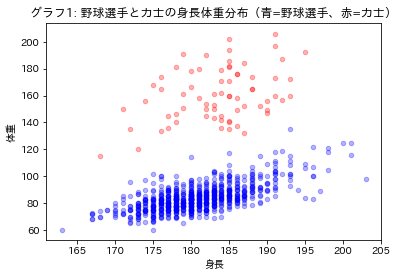

In [2]:
# グラフ生成用コード
df_b = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')
ax = df_b[['身長', '体重']].plot(kind='scatter', x='身長', y='体重', color='blue', alpha=0.3,
                             title='グラフ1: 野球選手と力士の身長体重分布（青=野球選手、赤=力士）')
df_s = pd.read_csv('../../9_data/相撲/力士身長体重.csv')
df_s[['身長', '体重']].plot(kind='scatter', x='身長', y='体重', color='red', alpha=0.3, ax=ax)

# 参考
# 175cm - 102kgはおかわりくん
# 野球選手で最重量にいるのは楽天のアマダー193cm - 135kg
# 力士で下に左下に外れているのは照強 - 168cm - 115kg
# 力士最重量にいるのは逸ノ城191cm - 206kg


In [3]:
baseball = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')
baseball['BMI'] = baseball['体重'] / ((baseball['身長'] / 100) ** 2)
baseball.head(3)

,チーム,背番号,氏名,生年月日,身長,体重,投,打,BMI
0,広島,11,福井 優也,1988.02.08,178,85,右,右,26.827421
1,広島,12,九里 亜蓮,1991.09.01,187,92,右,右,26.309017
2,広島,13,加藤 拓也,1994.12.31,176,88,右,右,28.409091


In [4]:
sumou = pd.read_csv('../../9_data/相撲/力士身長体重.csv')
sumou['BMI'] = sumou['体重'] / ((sumou['身長'] / 100) ** 2)
sumou.head(3)

,しこ名,身長,体重,BMI
0,玉鷲 一朗,188.0,174.0,49.230421
1,旭秀鵬 滉規,190.0,147.0,40.720222
2,朝乃山 英樹,188.0,165.0,46.684020


In [5]:
def std(x):
    """
    標準偏差を求める
    :param x: 標本
    :return: 標準偏差
    """
    # 平均
    mu = np.mean(x)

    # 標準偏差
    sigma = 0.0

    # 要素数
    n = len(x)

    # 平均と要素の差を取って2乗する
    for i in range(n):
        sigma += (x[i] - mu) ** 2

    # 要素数で割る
    sigma /= n

    # これが標準偏差の2乗になる
    # 最後に平方根を取れば標準偏差になる
    return np.sqrt(sigma)


# 野球のBMI標準偏差
baseball_std = std(baseball['BMI'])

# 相撲のBMI標準偏差
sumou_std = std(sumou['BMI'])

pd.DataFrame({'標準偏差': [baseball_std, sumou_std]}, index=['野球', '相撲'])

,標準偏差
野球,2.177626
相撲,5.438643


In [6]:
# 野球のBMI標準偏差
baseball_std = np.std(baseball['BMI'])

# 相撲のBMI標準偏差
sumou_std = np.std(sumou['BMI'])

pd.DataFrame({'標準偏差': [baseball_std, sumou_std]}, index=['野球', '相撲'])

,標準偏差
野球,2.177626
相撲,5.438643


In [7]:
# 野球のBMI標準偏差
baseball_std = baseball['BMI'].std(ddof=0)
# 相撲のBMI標準偏差
sumou_std = sumou['BMI'].std(ddof=0)

pd.DataFrame({'標準偏差': [baseball_std, sumou_std]}, index=['野球', '相撲'])

,標準偏差
野球,2.177626
相撲,5.438643


In [8]:
# 正解例

baseball = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')
baseball['BMI'] = baseball['体重'] / (baseball['身長'] / 100) ** 2
mu = baseball['BMI'].mean()
std = np.std(baseball['BMI'])
x = len(baseball)
y = len(baseball[(baseball['BMI'] < mu + std * 1.96) & (baseball['BMI'] > mu - std * 1.96)])
print('{0:.3f}%'.format(y / x * 100))

95.012%


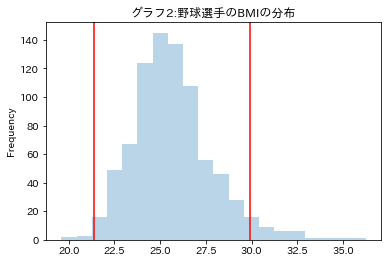

In [9]:
# サンプルグラフ
# 野球選手の分布
baseball = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')
baseball['BMI'] = baseball['体重'] / (baseball['身長'] / 100) ** 2
ax = baseball['BMI'].plot(kind='hist', title='グラフ2:野球選手のBMIの分布', bins=20, alpha=0.3)
bmi_mean = baseball['BMI'].mean()
bmi_std = np.std(baseball['BMI'])
ax.axvline(bmi_mean + bmi_std * 1.96, color='red')
ax.axvline(bmi_mean - bmi_std * 1.96, color='red')

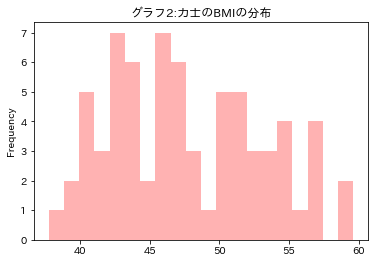

In [10]:
# サンプルグラフ
# 力士のBIMの分布
sumou = pd.read_csv('../../9_data/相撲/力士身長体重.csv')
sumou['BMI'] = sumou['体重'] / (sumou['身長'] / 100) ** 2
sumou['BMI'].plot(kind='hist', title='グラフ2:力士のBMIの分布', bins=20, alpha=0.3, color='red')